# Write a Data Science Blog Post

### Udacity Data Science Nanodegree program

## Table of Contents

* [Importing Libraries](#first-bullet)
* [Business Understanding](#second-bullet)
* [Data Understanding](#third-bullet)
* [Data Preparation](#fourth-bullet)
* [Data Modelling](#sixth-bullet)
* [Results Evaluation](#seventh-bullet)

## Importing Libraries <a class="anchor" id="first-bullet"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from Functions import PCAvariance, PCAcompWeights, PCATest, ClustersProportions, PlottingGamesClusters
from Functions import GettingInfo1, GettingInfo2, DevStatistics, GamesDeveloped, NaNValuesDistribution, CreatingScoresGenres
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

## Business Understanding <a class="anchor" id="second-bullet"></a>

### Determining business objectives

This data analysis has as an objective the understanding of how good first-party video games developers are creating highly rated video games. Nowadays, the video games console market is mainly driven by Nintendo, Sony and Microsoft. Nintendo has been developing videos games for almost 25 years already, while Sony and Microsoft have been involved with the video games since the earlies 2000s. Thus, is important to understand how good these games are if the Nintendo experience or the Microsoft and Sony resources are more important when creating highly rated video games. 

### Asses Situation

intendo has been developing videos games for almost 25 years already, while Sony and Microsoft have been involved with the video games since the earlies 2000s. Thus, is important to understand how good these games are if the Nintendo experience or the Microsoft and Sony resources are more important when creating highly rated video games. 

### Data Mining goals

The goals for this project are the finding of answer for the following questions:

- How similar are rating given from the Metacritic webpage and the video games players?
- How can rated games be group into clusters depending on their genres?
- How these clusters change when considering only games developed for specific periods?
- How good are first-party companies developing video games? in terms of ratings given by Metacritic.
- How good first-party companies have been developing video games for specific periods?

### Procedure project plan

This analysis of data to answer the mentioned questions follows the next steps:

-    Understanding of the data
-    Preparation of the information
-    Use of PCA and K-means to group games with similar rates
-    Use of boxplot to understand the data statistics
-    Answering the questions

## Data Understanding <a class="anchor" id="third-bullet"></a>

### Collect Initial Data

#### Loading data obtained from Kaggle

In this section is obtained data related to the Metacritic reviews, that also includes the Metacritic scores and players' ratings for several videogames. The information was gathered by Dahlia, a kaggle user, the link to this dataset is presented next:

https://www.kaggle.com/dahlia25/metacritic-video-game-comments

The dataset was downloaded manually and is loaded as a pandas data frame as shown below.

In [2]:
#Loading data obtained from a kagglecompetition
df =  pd.read_csv('metacritic_game_info.csv')

### Data description

#### Description of the data

The data obtained is formed by scores given by the Metacritic webpage and by video games players and from a variable that defines which publisher is related with first-party developers. Additionally, data contains a column that specifies to which console generation belongs each of the video games rated, the year when the video games were published, the video games titles and the number of players that support each of them. Next is presented an example of the gathered information:

In [3]:
df.head()

,Unnamed: 0,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
4,4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player


#### Formats for the dataframe columns

In [4]:
df.dtypes

Unnamed: 0        int64
Title            object
Year             object
Publisher        object
Genre            object
Platform         object
Metascore        object
Avg_Userscore    object
No_Players       object
dtype: object

#### Dataframe statistics

The statistics for some of the most relevant columns are presented next. It can be seen the difference in ranges of scores given by the Metacritic webpage and the video games players, which is reflected in the columns standard deviation. Moreover, the Metascores looks like they behave like a right-skewed normal distribution, while the player's scores look like it behaves as a left-skewed normal distribution.

In [5]:
df[(df.Year == 'not specified') | (df.Avg_Userscore == 'not specified') | (df.Avg_Userscore == 'tbd')] =np.nan

df.Metascore = df.Metascore.astype(float)
df.Avg_Userscore = df.Avg_Userscore.astype(float)#*10

df.describe()

,Unnamed: 0,Metascore,Avg_Userscore
count,4913.000000,4913.000000,4913.000000
mean,2482.809078,83.170364,7.769733
std,1442.192477,4.347029,0.958150
min,0.000000,77.000000,1.600000
25%,1234.000000,80.000000,7.400000
50%,2475.000000,82.000000,8.000000
75%,3727.000000,86.000000,8.400000
max,4999.000000,99.000000,9.300000


### Data exploration

#### Data distributions

In this section are presented the distributions for the Metascores and the video games players scores. It can be observed that the Metascores behaves like a right-skewed normal distribution, while the player's scores behave like a normal left-skewed distribution. Furthermore, it can be appreciated that both scores are almost uncorrelated. 

C:\Users\alfonso\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alfonso\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


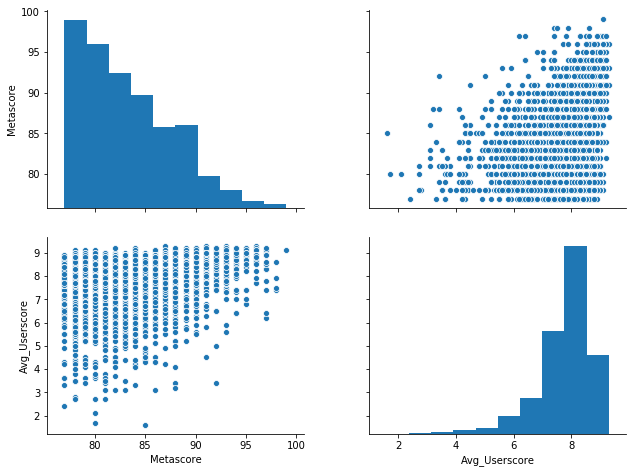

In [6]:
columns = ['Metascore', 'Avg_Userscore']

ax = sns.pairplot(df[columns])
ax.fig.set_size_inches(10,7)

#### Scores correlations

In the figure below is presented the amount of correlation that exists between the Metacritic and the video games players scores. It can be observed that there is almost a null correlation among them. 

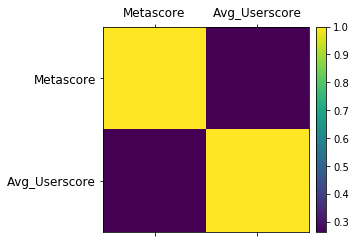

In [7]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(4,4))
im = ax.matshow(df[columns].corr());
ax.set_xticklabels(['','Metascore','Avg_Userscore',''], fontsize=12);
ax.set_yticklabels(['','Metascore','Avg_Userscore',''], fontsize=12);
divider = make_axes_locatable(ax);
cax = divider.append_axes('right', size='5%', pad=0.1);
fig.colorbar(im, cax=cax, orientation='vertical');

### Data Quality

The data was assessed in order to find undefined values and to generate additional information that helps to perform a more understandable analysis to have better conclusions about the data.

#### Undefined values 

Undefined values were assessed on the dataframe. In the next figures are presented the amount of *nan* values on each of the dataframe columns, the distribution of *nan* values and the occurrence within the dataframe rows, respectively.

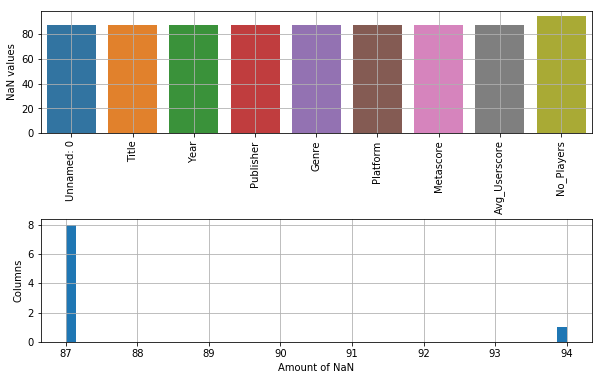

In [8]:
# Perform an assessment of how much missing data is on each column of the dataframe.
null_columns=df.columns[df.isnull().any()]

# Displaying the amount og missing values for each column and the nan values distribution
NaNValuesDistribution(df, null_columns)

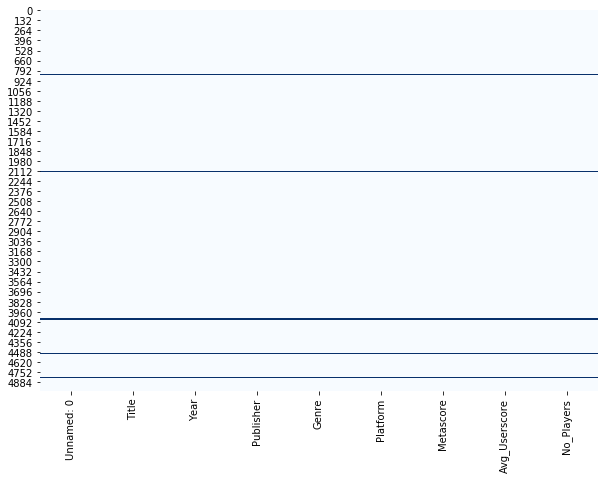

In [9]:
#Patterns of nan values in the dataframne rows
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.isnull(), cbar=False,cmap="Blues");

The previous figures let us know which actions to implement in order to reduce the effects of the *nan* values. Then:

- Remove all rows with nan values, since the proportion of nan values is small compared with the rest of the available data. 

#### Unused columns

In [10]:
df.head()

,Unnamed: 0,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,0.0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99.0,9.1,1 Player
1,1.0,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98.0,7.4,1-2
2,2.0,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98.0,7.5,1 Player
3,3.0,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98.0,8.6,1-2
4,4.0,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98.0,7.9,1 Player


The *Unnamed: 0* column is redundant since it provides the same information as the dataframe index. Then:

- Remove the Unnamed: 0 column

#### Columns with too much information

It can be seen in the *Genre* column of the dataframe that it contains too much information, all possible genres to which their related games can be classified. However, this complexity increases the processing of the data, then, the following actions need to be implemented:

- Create dataframes containing scores for each of the video games genres rated, for the metascores and the user's scores, respectively.

#### Handling non numerical categorical variables

Some columns contain information represented as categorical data, but because those are represented as strings increase the complexity when analysing their relationship with the rest of the columns. Thus, it is necessary to implement the following action:

- Convert non-numerical categorical data into categorical numerical data.

## Data preparation <a class="anchor" id="fourth-bullet"></a>

The data was assessed in order to find undefined values and to generate additional information that helps to perform a more understandable analysis and to have better conclusions about the data.

### Data selection

#### Collecting additional data

- Getting data that describe first party companies and their affiliates

    The previously obtained information is complemented with Wikipedia information about which publishers and developers are first party companies or are affiliated companies to them. This is important to answer the questions of interest. 

In [11]:
df = GettingInfo1(df)

- Getting data that describes the video games console generations

    More information is obtained from the Quora webppage, to define the consoles generations years:

In [12]:
df = GettingInfo2(df)

In [13]:
df.head()

,Unnamed: 0,Title,Year,Generation,Publisher,FirstParty,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,0.0,The Legend of Zelda: Ocarina of Time,1998,5,Nintendo,Nintendo,Action Adventure;Fantasy,Nintendo64,99.0,9.1,1 Player
1,1.0,Tony Hawk's Pro Skater 2,2000,6,NeversoftEntertainment,No,Sports;Alternative;Skateboarding,PlayStation,98.0,7.4,1-2
2,2.0,Grand Theft Auto IV,2008,7,RockstarNorth,No,Action Adventure;Modern;Modern;Open-World,PlayStation3,98.0,7.5,1 Player
3,3.0,SoulCalibur,1999,6,Namco,No,Action;Fighting;3D,Dreamcast,98.0,8.6,1-2
4,4.0,Grand Theft Auto IV,2008,7,RockstarNorth,No,Action Adventure;Modern;Modern;Open-World,Xbox360,98.0,7.9,1 Player


#### Data excluded from the analysis

The *No_Players* column can be dropped, given that it is not considered to answers the previously introduces questions of interest.

In [14]:
df.drop('No_Players', axis=1, inplace=True)

df.head()

,Unnamed: 0,Title,Year,Generation,Publisher,FirstParty,Genre,Platform,Metascore,Avg_Userscore
0,0.0,The Legend of Zelda: Ocarina of Time,1998,5,Nintendo,Nintendo,Action Adventure;Fantasy,Nintendo64,99.0,9.1
1,1.0,Tony Hawk's Pro Skater 2,2000,6,NeversoftEntertainment,No,Sports;Alternative;Skateboarding,PlayStation,98.0,7.4
2,2.0,Grand Theft Auto IV,2008,7,RockstarNorth,No,Action Adventure;Modern;Modern;Open-World,PlayStation3,98.0,7.5
3,3.0,SoulCalibur,1999,6,Namco,No,Action;Fighting;3D,Dreamcast,98.0,8.6
4,4.0,Grand Theft Auto IV,2008,7,RockstarNorth,No,Action Adventure;Modern;Modern;Open-World,Xbox360,98.0,7.9


### Cleaning Data

##### Action to implement to clean the data:

- Remove all rows with nan values, since the proportion of nan values is small compared with the rest of the available data. 

##### Code:

In [15]:
# Perform an assessment of how much missing data is on each row of the dataframe.
df.dropna(axis=0, inplace=True)

#Reset the indexs 
df.reset_index( drop=True, inplace=True)

##### Test:

In [16]:
df.isnull().any()

Unnamed: 0       False
Title            False
Year             False
Generation       False
Publisher        False
FirstParty       False
Genre            False
Platform         False
Metascore        False
Avg_Userscore    False
dtype: bool

##### Action to implement to clean the data:

- Remove the Unnamed: 0 column

##### Code:

In [17]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

##### Test:

In [18]:
df.columns

Index(['Title', 'Year', 'Generation', 'Publisher', 'FirstParty', 'Genre',
       'Platform', 'Metascore', 'Avg_Userscore'],
      dtype='object')

### Constructing data

Deriving attributes from the dataframe Genres column, as mentioned in the previous section.

##### Action to implement
- Create dataframes containing scores for each of the video games genres rated, for the metascores and the user's scores, respectively.

##### Code:

In [19]:
dfMetas = CreatingScoresGenres(df)

C:\Users\alfonso\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test:

In [20]:
dfMetas.head()

,Title,Wrestling,Trainer,Kart,Top-Down,Music,Tactics,Text,Music Maker,Ski / Snowboard,...,Point-and-Click,Helicopter,Roguelike,Tactical,Vertical,Car Combat,Defense,4X,Soccer,Snow / Water
0,The Legend of Zelda: Ocarina of Time,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grand Theft Auto IV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SoulCalibur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grand Theft Auto IV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tony Hawk's Pro Skater 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Formatting the data

##### Action to implement

- Preparing the data frame for the analysis by converting categorical non-numerical variables intro numerical

##### Code:

In [21]:
#Encoding first parties companies as numerical data
df.FirstParty = df.FirstParty.replace('Nintendo', '1')
df.FirstParty = df.FirstParty.replace('Sony', '2')
df.FirstParty = df.FirstParty.replace('Microsoft', '3')
df.FirstParty = df.FirstParty.replace('No', '0')

#Changing numerical columns represented as strings to integers
df.Year = pd.to_numeric(df.Year)
df.FirstParty = pd.to_numeric(df.FirstParty)
df.Metascore = pd.to_numeric(df.Metascore)
df.Avg_Userscore = pd.to_numeric(df.Avg_Userscore)*10
df.Avg_Userscore = df.Avg_Userscore.replace(-10, np.nan)

##### Test

In [22]:
df.dtypes

Title             object
Year               int64
Generation         int64
Publisher         object
FirstParty         int64
Platform          object
Metascore        float64
Avg_Userscore    float64
dtype: object

##### Action to implement

- Copy the 'Generation' column of the df dataframe to the dataframes containing the genres rates

##### Code:

In [23]:
dfMetas['Generation'] = df.Generation

##### Test:

In [24]:
dfMetas.columns

Index(['Title', 'Wrestling', 'Trainer', 'Kart', 'Top-Down', 'Music', 'Tactics',
       'Text', 'Music Maker', 'Ski / Snowboard',
       ...
       'Helicopter', 'Roguelike', 'Tactical', 'Vertical', 'Car Combat',
       'Defense', '4X', 'Soccer', 'Snow / Water', 'Generation'],
      dtype='object', length=151)

## Data Modelling <a class="anchor" id="sixth-bullet"></a>

### Clustering the Metacritic scores depending on the videogames genres
In this section is used PCA to reduce the dimensionality of a data frame composed by video games ratings given to each of the video games genres that composed the gathered data. Moreover, K-means is used to group video games with similar types that were rated similarly. 

This is implemented to understand how video games are rated. Then, the PCA and the k-means trained models are used to obtained clusters for video games developed on each of the console generations, to understand how these clusters that represent how video games are rated have changed through the development of different video games consoles. 


In [25]:
Genres = dfMetas.columns[1:-1].tolist()
scaler = StandardScaler()
#dfMetas[columns] = scaler.fit_transform(dfMetas[columns])
dfMetas.describe()

,Wrestling,Trainer,Kart,Top-Down,Music,Tactics,Text,Music Maker,Ski / Snowboard,Exercise / Fitness,...,Helicopter,Roguelike,Tactical,Vertical,Car Combat,Defense,4X,Soccer,Snow / Water,Generation
count,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,...,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000
mean,0.562996,0.293711,0.326074,0.622634,1.789538,1.347446,0.034806,0.115815,0.065133,0.096682,...,0.034195,0.096479,1.732953,0.554447,0.067169,0.319357,0.465703,2.410340,0.068390,7.038876
std,6.750358,4.987100,5.241668,7.154506,12.126793,10.484671,1.727287,3.067280,2.282437,2.765579,...,1.695117,2.759875,11.856959,6.748623,2.357582,5.128597,6.276255,13.938636,2.400165,0.826768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,90.000000,88.000000,93.000000,90.000000,93.000000,92.000000,90.000000,84.000000,82.000000,81.000000,...,86.000000,82.000000,92.000000,90.000000,91.000000,89.000000,94.000000,93.000000,92.000000,8.000000


#### Analyzing the principal components analysis for the metascores

Firs, PCA is used to reduce the dimensionality

In [26]:
columns = Genres
pcaTot = PCA()
pcaTot.fit(dfMetas[columns])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

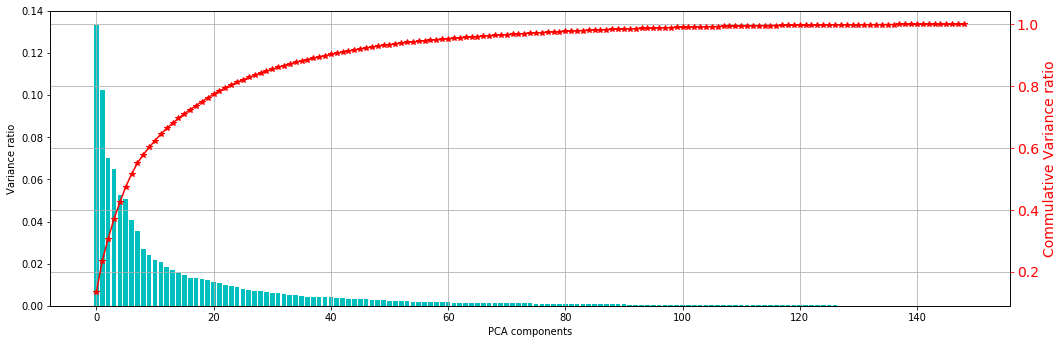

In [27]:
# Investigate the variance accounted for by each principal component.
VarRat = pcaTot.explained_variance_ratio_

Suma = 0
VarRatAcum = []

for var in pcaTot.explained_variance_ratio_:
    Suma+=var
    VarRatAcum.append(Suma)

PCAvariance(VarRat, VarRatAcum)

Then, the first 30 components are used to represent the 85 % of the total variance.

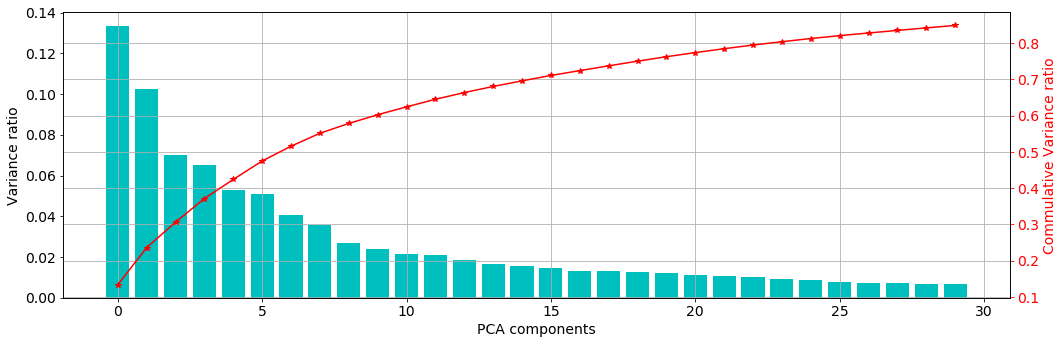

In [28]:
pcaTot = PCA(n_components=30)

pcaTot.fit(dfMetas[Genres])

PCATot = pcaTot.transform(dfMetas[Genres])

VarRat = pcaTot.explained_variance_ratio_

Suma = 0
VarRatAcum = []

for var in pcaTot.explained_variance_ratio_:
    Suma+=var
    VarRatAcum.append(Suma)

PCAvariance(VarRat, VarRatAcum)

The first component is composed as presented next:

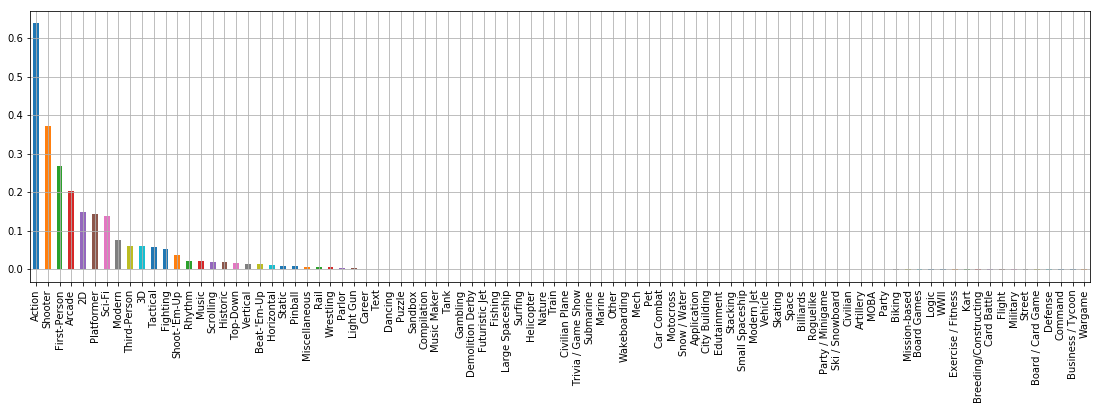

In [29]:
PCAcompWeights(pcaTot, dfMetas[Genres], Genres, 1, plot=True)

Then, the elbow rule is used to determine the number of clusters to group the data frame using k-means.

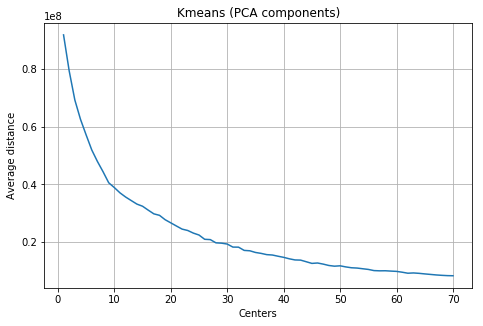

In [30]:
n_scor = [70]

PCATest(PCATot, n_scor, PCATot.shape[0], layout=(1,1), Figsize=(7,4))

The previous figure shows distances among clusters and their elements. Therefore, 30 clusters are enough to represent the data, because of the elbow effect shown in the figure. Then, kmeans is used to find these clusters. 

In [31]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeansTot = KMeans(30, random_state=0)
modelTot = kmeansTot.fit(PCATot)
PredMeta = modelTot.predict(PCATot)

Clusters obtained:

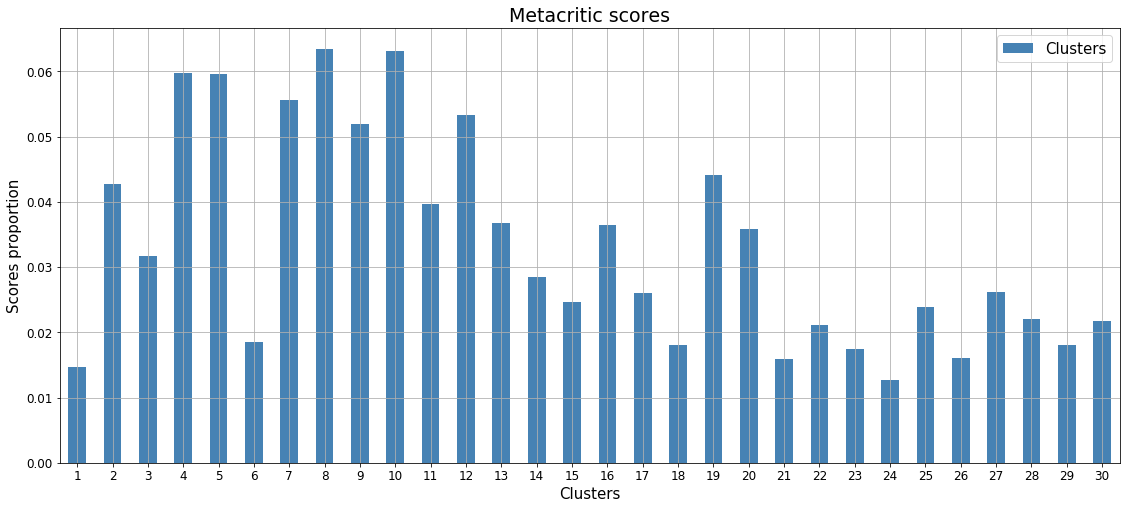

In [32]:
ClustersProportions(PredMeta, 30)

Finding clusters for the games rated on each of the video games console generations:

- 5ts console war

In [33]:
PCA5th = pcaTot.transform(dfMetas[dfMetas['Generation'] == 5][Genres])
PredMetas5th = modelTot.predict(PCA5th)

- 6th console war

In [34]:
PCA6th = pcaTot.transform(dfMetas[dfMetas['Generation'] == 6][Genres])
PredMetas6th = modelTot.predict(PCA6th)

- 7th console war

In [35]:
PCA7th = pcaTot.transform(dfMetas[dfMetas['Generation'] == 7][Genres])

In [36]:
PredMetas7th = modelTot.predict(PCA7th)

- 8th console war

In [37]:
PCA8th = pcaTot.transform(dfMetas[dfMetas['Generation'] == 8][Genres])

In [38]:
PredMetas8th = modelTot.predict(PCA8th)

## Evaluation Results <a class="anchor" id="seventh-bullet"></a>

### Answering questions:

#### How similar are ratings given to games by Metacritic and the video games players?

In the following figure is presented a comparison between rates given by Metacritic and the average rates given by players. It can be observed differences between both of them.

The differences can be observed better in the next table, where are presented the statics of the data. The minimum score expected from Metacritic is 77 and the maximum rate expected is 99, while for the users the minimum and the maximum expected rates are 16 and 93, respectively. These difference let us know how much variance exists between rates given by the Metacritic webpage and the players. 

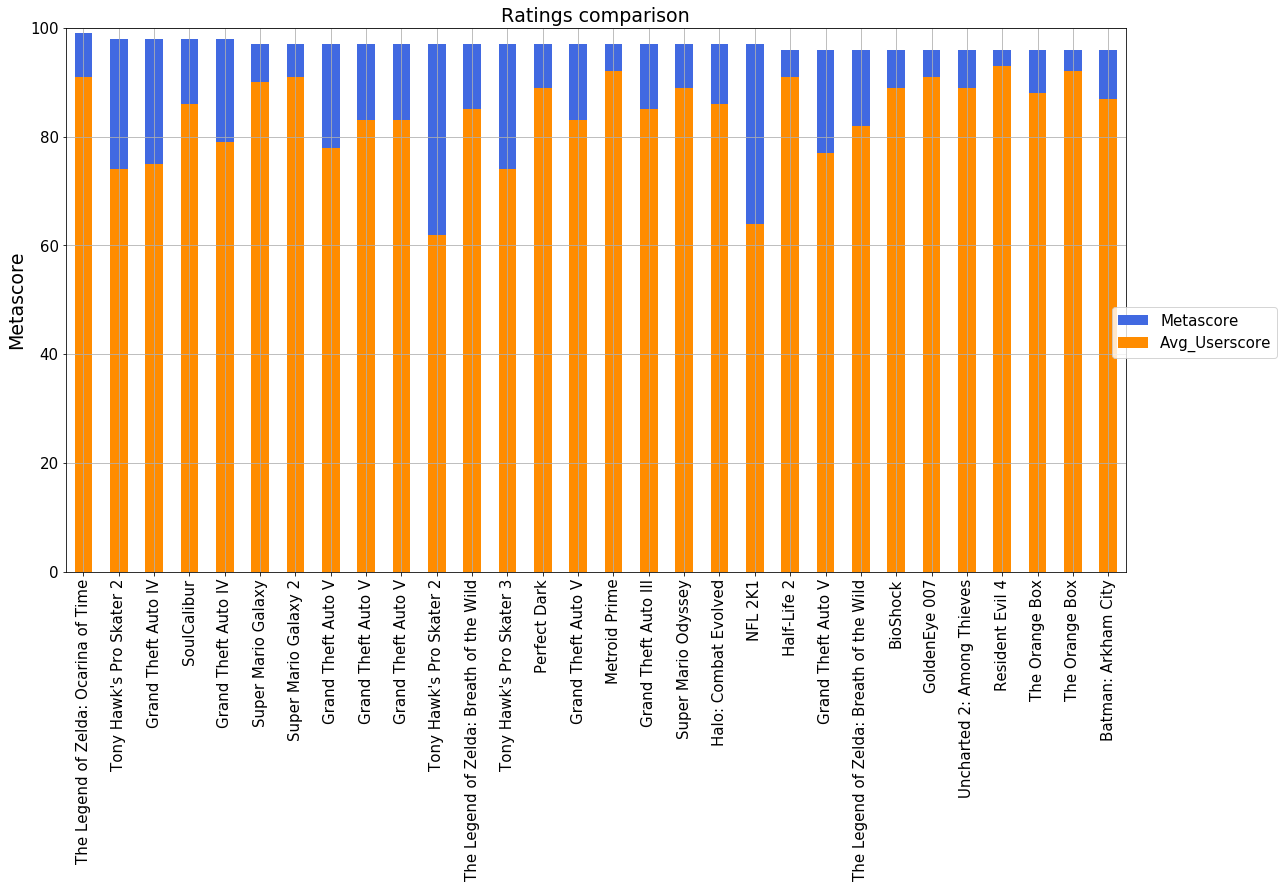

In [39]:
ax = plt.gca()
df.iloc[range(0,30)].plot('Title', 'Metascore', kind='bar', figsize=(18,10), ax=ax, color='royalblue');
df.iloc[range(0,30)].plot(x='Title', y='Avg_Userscore',  kind='bar', figsize=(19,10), secondary_y=False,color='darkorange', ax=ax, fontsize=15);
ax.set_ylim(0,100)
plt.grid();
ax.legend(loc=1, bbox_to_anchor=(1.15,0.5),prop={'size': 15});
plt.xlabel('');
plt.ylabel('Metascore', fontsize=19);
plt.title('Ratings comparison', fontsize=19);

In [40]:
df[['Metascore','Avg_Userscore']].describe()

,Metascore,Avg_Userscore
count,4913.000000,4913.000000
mean,83.170364,77.697334
std,4.347029,9.581501
min,77.000000,16.000000
25%,80.000000,74.000000
50%,82.000000,80.000000
75%,86.000000,84.000000
max,99.000000,93.000000


#### How can rated games be group into clusters depending on their genres?

The rated games can be grouped into clusters using the Kmean model trained based on the PCA algorithm implemented. The obtained clusters are presented next, where each of them contains rated from video games with similar genres. These clusters represent games rated since 1998. 

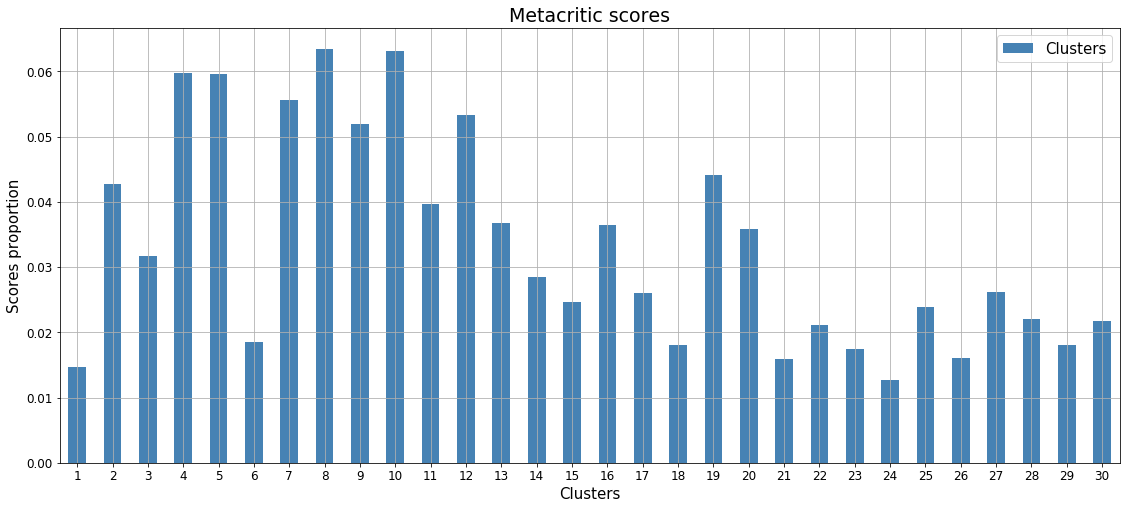

In [41]:
ClustersProportions(PredMeta, 30)

#### How the found clusters change when are considering only games developed for specific periods?

It can be concluded that the clusters are different during the fifth video games console generation, but they tend to look more similar to the previosly presented clusters as the time pass.  As result, groups obtained from the current generation
553/5000
¿Qué tan buenas son las empresas propias que desarrollan videojuegos?

Los puntajes dados a los juegos desarrollados por Nintendo tienen una variación similar a la varianza dada a los puntajes dados a los juegos desarrollados por Sony. Por otro lado, la variación de las puntuaciones otorgadas a los juegos desarrollados por Microsoft es menor. Además, en todos los parámetros medidos en los diagramas de caja que se presentan a continuación, la mediana, el primer y el tercer cuartil, y sus valores máximos mínimos de valores atípicos, Nintendo tiene mejores calificaciones que Sony y Microsoft, mientras que Sony tiene mejores calificaciones que Microsoft. are similar to the clusters obtained when using all the dataset. The components for each of the clusters are not analysed because there interest is not on that, but to find different patterns of groups for each console generations.

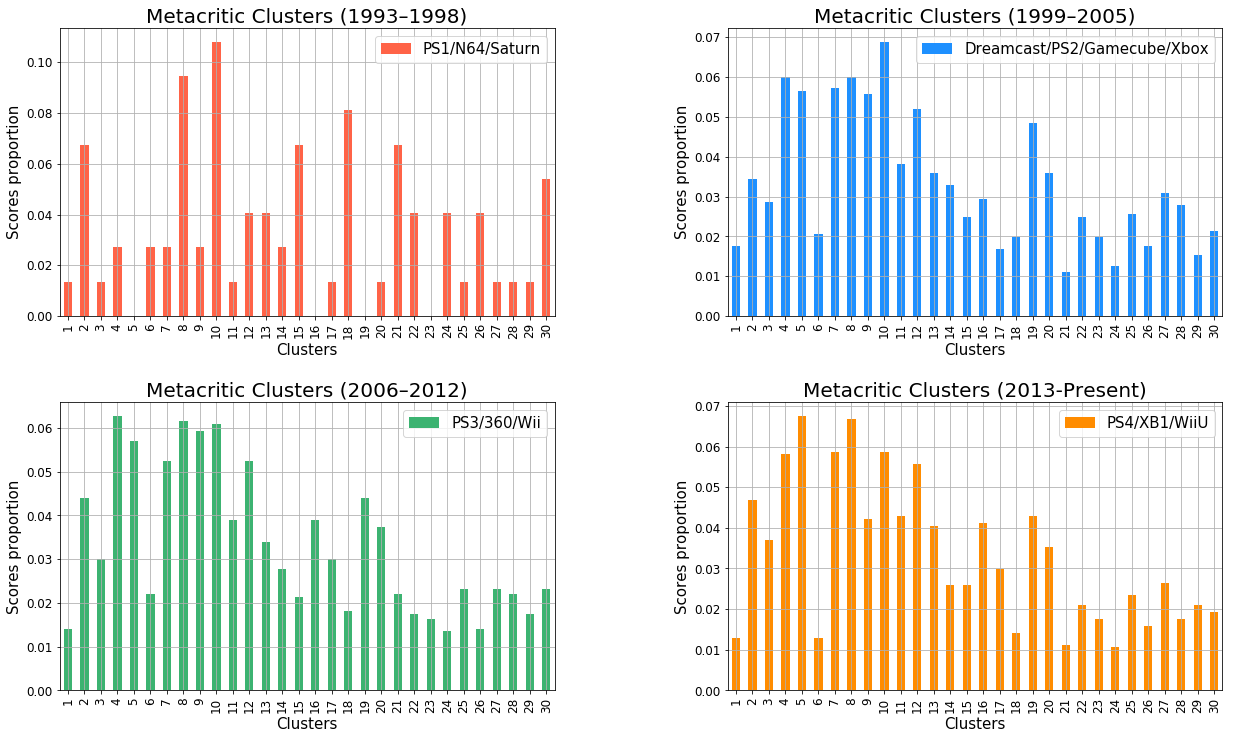

In [42]:
Comp = [30, 30, 30, 30]
PlottingGamesClusters(PredMetas5th, PredMetas6th, PredMetas7th, PredMetas8th, Comp)

#### How good are first-party companies developing video games? in terms of ratings given by Metacritic.

The score variances to games developed by Nintendo is similar to the variance given to rates developed by Sony. The variance for rated games developed by Microsoft is smaller than the rest of the developers. Moreover, in all parameters measured in a boxplot, the median, the first and thirds quartiles, and their maximum a minimimun not outliers values, Nintendo has better scores that Sony and Microsoft, while Sony has better ratings than Microsoft. 

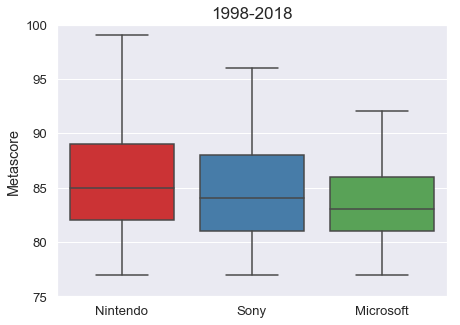

In [43]:
#Comparing the quality of games developed from Nintendo, Sony and Microsoft
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
my_pal = sns.color_palette("Set1", n_colors=3, desat=1)
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.boxplot(x="FirstParty", y="Metascore", palette=my_pal, data=df[(df['FirstParty'] <= 3) & (df['FirstParty'] > 0)])
ax.set(xticklabels=['Nintendo', 'Sony', 'Microsoft']);
plt.title('1998-2018', fontsize=17)
ax.set_ylim(75,100);
plt.xlabel('');

#### How good have been first-party companies developing video games for the different video games console generations?

In the following figure can be observed that Nintendo has been the most constant game developer in term of how their games are scored when compared with Sony and Microsoft, which have had significant differences in how their video games have been rated. In general, it can be concluded that games developed by Microsoft are ranked lower than games developed by Nintendo and Sony. More information is needed to understand better why Sony's video games scores behave as in the presented in the next figure.

C:\Users\alfonso\Desktop\BlogPost\Functions.py:442: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="FirstParty", y="Metascore", palette=my_pal,data=df[(df['FirstParty'] <= 3) & (df['FirstParty'] > 0)][df['Generation']==5],  ax=ax, showmeans=True);
C:\Users\alfonso\Desktop\BlogPost\Functions.py:448: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="FirstParty", y="Metascore", palette=my_pal, data=df[(df['FirstParty'] <= 3) & (df['FirstParty'] > 0)][df['Generation']==6], ax=ax, showmeans=True);
C:\Users\alfonso\Desktop\BlogPost\Functions.py:454: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="FirstParty", y="Metascore", palette=my_pal, data=df[(df['FirstParty'] <= 3) & (df['FirstParty'] > 0)][df['Generation']==7], ax=ax, showmeans=True);
C:\Users\alfonso\Desktop\BlogPost\Functions.py:460: UserWarning: Boolean Series key will be reindexed to match DataFrame 

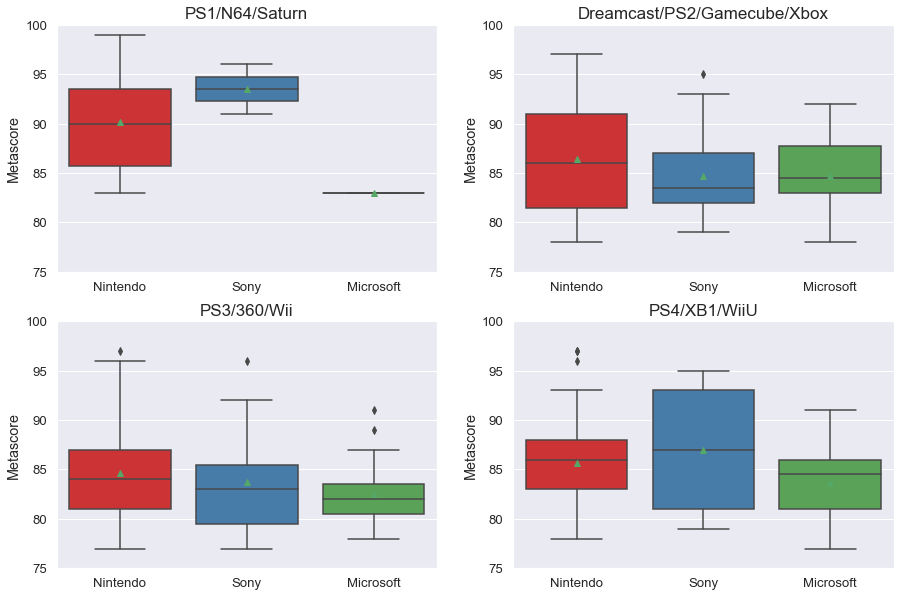

In [44]:
DevStatistics(df, my_pal)

### Discussion:

The following table gave us a better understanding of why video games developed by Sony are rated as presented in the last figure, especially when compared against games developed by Nintendo. In General, Nintendo has developed more games than Sony and Microsoft on each of the presented video games console generations-. This may be because of the lack of support from third-party companies. Nonetheless, considering the number of video games developed by Sony and Microsoft, it can be concluded that Nintendo has a better-quality control system developing games than Sony, since in general scores given to Nintendo games present less variance than scores given to Sony games, especially during the current video game console generation. Furthermore, Microsoft also presents a very constant quality developing games, since the sixth generation of video game consoles in which they started developing consoles. 

In [45]:
GamesPerDev = GamesDeveloped(df)
GamesPerDev

C:\Users\alfonso\Desktop\BlogPost\Functions.py:485: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = df[df['Generation']==n][df['FirstParty']==m]
C:\Users\alfonso\Desktop\BlogPost\Functions.py:485: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = df[df['Generation']==n][df['FirstParty']==m]
C:\Users\alfonso\Desktop\BlogPost\Functions.py:485: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = df[df['Generation']==n][df['FirstParty']==m]
C:\Users\alfonso\Desktop\BlogPost\Functions.py:485: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = df[df['Generation']==n][df['FirstParty']==m]
C:\Users\alfonso\Desktop\BlogPost\Functions.py:485: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = df[df['Generation']==n][df['FirstParty']==m]
C:\Users\alfonso\Desktop\BlogPost\Functions.py:485: UserWarning: Boolean Series key will be reindexed to 

,FirstParty,Generation,RatedGames
0,Nintendo,5,6
1,Sony,5,2
2,Microsoft,5,1
3,Nintendo,6,63
4,Sony,6,26
5,Microsoft,6,18
6,Nintendo,7,61
7,Sony,7,19
8,Microsoft,7,23
9,Nintendo,8,49


### Conclusions

The game industry is a complex field to implement data analysis, even when pages like Metacritic and Otaku let us have some idea of how successful are the companies that form this industry, in terms of gamers preferences for their games. As a conclusion, it can say that Nintendo is the best first-party video game developer because of how their games are rated, in general. Nintendo is recognised as one of the most iconic video games developers, with some of the most relevant characters and franchises in the video games history. However, Sony and Microsft have invested a lot of money to became some of the most successful company in the video game industry in recent years. As a result, some of the best video games of the last three video games consoles generations have been developed from these companies, like Halo and The last of Us.

However, the analysis is subjective, as being based on scores given from a specific webpage. As presented before, the ratings given from the Metacritic webpage have significant variance when compared with scores given by gamers on the same website. Here is where the subjective of the analysis is present. Moreover, the games rating can be clustered depending on their genres, which can also be a bias of how good or bad are those games scored, depending on the preference that has the persons that give the scores to the games.  

### Future Work

A good way to increase the robustness of this analysis is by complementing the information used with similar sources. This can be achieved by assessing how many digital and physical copies have been sold for each of the analysed video games titles. A correlation between scores given by Metacritic and the number of copies sold could provide a better metric about how successful is a first party company developing video games. Additionally, ratings from the Otaku webpage can also be used to increase the robustness of the analysis. 